# Major_Project(ML041B3)

### Name: Naveena Kota

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Importing datasets and Exploring

In [2]:
data_train=pd.read_excel('Data_Train.xlsx')
data_test=pd.read_excel('Data_Test.xlsx')

In [3]:
data_train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [4]:
data_test.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0


In [5]:
data_train.shape

(6019, 12)

In [6]:
data_test.shape

(1234, 11)

In [7]:
data_train.isna().sum() #There are few null values in the given dataset 

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

In [8]:
data_test.isna().sum() 

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               0
Engine               10
Power                10
Seats                11
dtype: int64

There are few missing values in some columns

# Cleaning the Data

In [9]:
print(data_train.Transmission.unique())
print(data_test.Transmission.unique())

['Manual' 'Automatic']
['Manual' 'Automatic']


In [10]:
print(data_train.Fuel_Type.unique())
print(data_test.Fuel_Type.unique())

['CNG' 'Diesel' 'Petrol' 'LPG' 'Electric']
['CNG' 'Petrol' 'Diesel' 'LPG']


In [11]:
print(data_train.Owner_Type.unique())
print(data_test.Owner_Type.unique())

['First' 'Second' 'Fourth & Above' 'Third']
['First' 'Second' 'Third' 'Fourth & Above']


In [12]:
print(data_train.Location.unique())
print(data_test.Location.unique())

['Mumbai' 'Pune' 'Chennai' 'Coimbatore' 'Hyderabad' 'Jaipur' 'Kochi'
 'Kolkata' 'Delhi' 'Bangalore' 'Ahmedabad']
['Delhi' 'Coimbatore' 'Mumbai' 'Hyderabad' 'Pune' 'Jaipur' 'Chennai'
 'Kochi' 'Bangalore' 'Kolkata' 'Ahmedabad']


In [13]:
# "Transmission","Fuel_type","Owner_Type" are Label Encoded
#"Location" is OneHotEncoded

In [14]:
owner = {"First":1, "Second":2, "Third":3, "Fourth & Above":4}
data_train.Owner_Type = [owner[i] for i in data_train.Owner_Type]
data_test.Owner_Type = [owner[i] for i in data_test.Owner_Type]
trans = {"Manual":0, "Automatic":1}
data_train.Transmission = [trans[i] for i in data_train.Transmission]
data_test.Transmission = [trans[i] for i in data_test.Transmission]
fuel = {"Diesel":0, "Petrol":1, "CNG":3, "LPG":4, "Electric":5} #Ordered on the Basis of Efficiency of the Fuel
data_train.Fuel_Type = [fuel[i] for i in data_train.Fuel_Type]
data_test.Fuel_Type = [fuel[i] for i in data_test.Fuel_Type]

In [15]:
name = data_train['Name']
array = []
for k in range(len(name)):
    array = list(name[k].split(' ',3))
    data_train.loc[k,'Brand'] = str(array[0])
    data_train.loc[k,'Model'] = str(array[1])
    data_train.loc[k,'Ver'] = str(array[2])
data_train = data_train.drop(columns = ['Name'])

In [16]:
name = data_test['Name']
array = []
for k in range(len(name)):
    array = list(name[k].split(' ',3))
    if(len(array) <=3):
      array.append("null")
    data_test.loc[k,'Brand'] = (array[0])
    data_test.loc[k,'Model'] = (array[1])
    data_test.loc[k,'Ver'] = (array[2])
data_test = data_test.drop(columns = ['Name'])

In [17]:
data_train.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model,Ver
0,Mumbai,2010,72000,3,0,1,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,Maruti,Wagon,R
1,Pune,2015,41000,0,0,1,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,Hyundai,Creta,1.6
2,Chennai,2011,46000,1,0,1,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,Honda,Jazz,V
3,Chennai,2012,87000,0,0,1,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,Maruti,Ertiga,VDI
4,Coimbatore,2013,40670,0,1,2,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,Audi,A4,New


In [18]:
# Removing the units of 'Mileage','Engine','Power'

In [19]:
columns = {'Mileage','Engine','Power'}
for i in columns:
    #for Train data
    array0 = data_train[i].str.split(" ",expand=True)
    data_train[i] = pd.to_numeric(array0[0],errors='coerce')
    #for Test data
    array1 = data_test[i].str.split(" ",expand=True)
    data_test[i] = pd.to_numeric(array1[0],errors='coerce')

In [20]:
data_train.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model,Ver
0,Mumbai,2010,72000,3,0,1,26.60,998.0,58.16,5.0,1.75,Maruti,Wagon,R
1,Pune,2015,41000,0,0,1,19.67,1582.0,126.20,5.0,12.50,Hyundai,Creta,1.6
2,Chennai,2011,46000,1,0,1,18.20,1199.0,88.70,5.0,4.50,Honda,Jazz,V
3,Chennai,2012,87000,0,0,1,20.77,1248.0,88.76,7.0,6.00,Maruti,Ertiga,VDI
4,Coimbatore,2013,40670,0,1,2,15.20,1968.0,140.80,5.0,17.74,Audi,A4,New


In [21]:
data_test.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand,Model,Ver
0,Delhi,2014,40929,3,0,1,32.26,998.0,58.20,4.0,Maruti,Alto,K10
1,Coimbatore,2013,54493,1,0,2,24.70,796.0,47.30,5.0,Maruti,Alto,800
2,Mumbai,2017,34000,0,0,1,13.68,2393.0,147.80,7.0,Toyota,Innova,Crysta
3,Hyderabad,2012,139000,0,0,1,23.59,1364.0,NaN,5.0,Toyota,Etios,Liva
4,Mumbai,2014,29000,1,0,1,18.50,1197.0,82.85,5.0,Hyundai,i20,Magna


In [22]:
# Label encoding for 'Brand','Model','Ver'

In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data_train['Brand'] = le.fit_transform(data_train['Brand'])
data_test['Brand'] = data_test['Brand'].map(lambda s: '<unknown>' if s not in le.classes_ else s)
le.classes_ = np.append(le.classes_, '<unknown>')
data_test['Brand'] = le.transform(data_test['Brand'])

In [24]:
le = LabelEncoder()
data_train['Model'] = le.fit_transform(data_train['Model'])
data_test['Model'] = data_test['Model'].map(lambda s: '<unknown>' if s not in le.classes_ else s)
le.classes_ = np.append(le.classes_, '<unknown>')
data_test['Model'] = le.transform(data_test['Model'])

In [25]:
le = LabelEncoder()
data_train['Ver'] = le.fit_transform(data_train['Ver'])
data_test['Ver'] = data_test['Ver'].map(lambda s: '<unknown>' if s not in le.classes_ else s)
le.classes_ = np.append(le.classes_, '<unknown>')
data_test['Ver'] = le.transform(data_test['Ver'])

In [26]:
data_train.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model,Ver
0,Mumbai,2010,72000,3,0,1,26.60,998.0,58.16,5.0,1.75,18,189,231
1,Pune,2015,41000,0,0,1,19.67,1582.0,126.20,5.0,12.50,10,53,10
2,Chennai,2011,46000,1,0,1,18.20,1199.0,88.70,5.0,4.50,9,99,280
3,Chennai,2012,87000,0,0,1,20.77,1248.0,88.76,7.0,6.00,18,69,286
4,Coimbatore,2013,40670,0,1,2,15.20,1968.0,140.80,5.0,17.74,1,10,221


In [27]:
data_test.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand,Model,Ver
0,Delhi,2014,40929,3,0,1,32.26,998.0,58.20,4.0,18,16,187
1,Coimbatore,2013,54493,1,0,2,24.70,796.0,47.30,5.0,18,16,82
2,Mumbai,2017,34000,0,0,1,13.68,2393.0,147.80,7.0,28,98,122
3,Hyderabad,2012,139000,0,0,1,23.59,1364.0,NaN,5.0,28,72,204
4,Mumbai,2014,29000,1,0,1,18.50,1197.0,82.85,5.0,10,210,213


In [28]:
# Onehotencoding of 'Location'

In [29]:
data_train['Location'] = data_train['Location'].astype('category')
data_train= pd.get_dummies(data_train, sparse=False, dtype='int64')
data_train.head()

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,...,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune
0,2010,72000,3,0,1,26.60,998.0,58.16,5.0,1.75,...,0,0,0,0,0,0,0,0,1,0
1,2015,41000,0,0,1,19.67,1582.0,126.20,5.0,12.50,...,0,0,0,0,0,0,0,0,0,1
2,2011,46000,1,0,1,18.20,1199.0,88.70,5.0,4.50,...,0,1,0,0,0,0,0,0,0,0
3,2012,87000,0,0,1,20.77,1248.0,88.76,7.0,6.00,...,0,1,0,0,0,0,0,0,0,0
4,2013,40670,0,1,2,15.20,1968.0,140.80,5.0,17.74,...,0,0,1,0,0,0,0,0,0,0


In [30]:
data_test['Location'] = data_test['Location'].astype('category')
data_test = pd.get_dummies(data_test, sparse=False, dtype='int64')
data_test.head()

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand,...,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune
0,2014,40929,3,0,1,32.26,998.0,58.20,4.0,18,...,0,0,0,1,0,0,0,0,0,0
1,2013,54493,1,0,2,24.70,796.0,47.30,5.0,18,...,0,0,1,0,0,0,0,0,0,0
2,2017,34000,0,0,1,13.68,2393.0,147.80,7.0,28,...,0,0,0,0,0,0,0,0,1,0
3,2012,139000,0,0,1,23.59,1364.0,NaN,5.0,28,...,0,0,0,0,1,0,0,0,0,0
4,2014,29000,1,0,1,18.50,1197.0,82.85,5.0,10,...,0,0,0,0,0,0,0,0,1,0


# Data Filling

In [31]:
data_train.isna().sum() 

Year                     0
Kilometers_Driven        0
Fuel_Type                0
Transmission             0
Owner_Type               0
Mileage                  2
Engine                  36
Power                  143
Seats                   42
Price                    0
Brand                    0
Model                    0
Ver                      0
Location_Ahmedabad       0
Location_Bangalore       0
Location_Chennai         0
Location_Coimbatore      0
Location_Delhi           0
Location_Hyderabad       0
Location_Jaipur          0
Location_Kochi           0
Location_Kolkata         0
Location_Mumbai          0
Location_Pune            0
dtype: int64

In [32]:
data_test.isna().sum() 

Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                 10
Power                  32
Seats                  11
Brand                   0
Model                   0
Ver                     0
Location_Ahmedabad      0
Location_Bangalore      0
Location_Chennai        0
Location_Coimbatore     0
Location_Delhi          0
Location_Hyderabad      0
Location_Jaipur         0
Location_Kochi          0
Location_Kolkata        0
Location_Mumbai         0
Location_Pune           0
dtype: int64

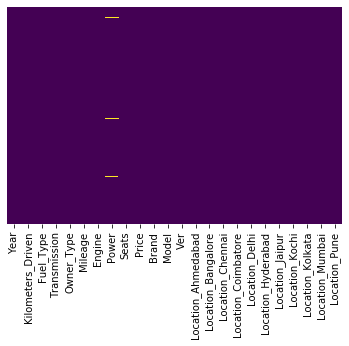

In [33]:
sns.heatmap(data_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')
#The yellow lines indicate the null values

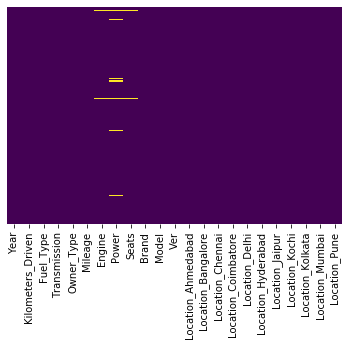

In [34]:
sns.heatmap(data_test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

###### The null values are filled with average value of each column

In [35]:
power_avg= data_train['Power'].mean()
power_avg

113.25304969366827

In [36]:
engine_avg=data_train['Engine'].mean()
engine_avg

1621.276449941501

In [37]:
seats_avg=data_train['Seats'].mean()
seats_avg

5.278735151413753

In [38]:
mil_avg=data_train['Mileage'].mean()
mil_avg

18.134960943992073

In [39]:
data_train['Power'].fillna(power_avg, inplace=True)

In [40]:
data_train['Engine'].fillna(engine_avg, inplace=True)

In [41]:
data_train['Seats'].fillna(seats_avg, inplace=True)

In [42]:
data_train['Mileage'].fillna(mil_avg, inplace=True)

In [43]:
data_train.isna().sum() 

Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                0
Engine                 0
Power                  0
Seats                  0
Price                  0
Brand                  0
Model                  0
Ver                    0
Location_Ahmedabad     0
Location_Bangalore     0
Location_Chennai       0
Location_Coimbatore    0
Location_Delhi         0
Location_Hyderabad     0
Location_Jaipur        0
Location_Kochi         0
Location_Kolkata       0
Location_Mumbai        0
Location_Pune          0
dtype: int64

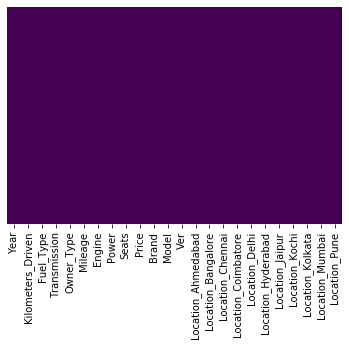

In [44]:
sns.heatmap(data_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [45]:
# So the data_train is completely filled

In [46]:
test_power_avg= data_test['Power'].mean()
test_engine_avg=data_test['Engine'].mean()
test_seats_avg=data_test['Seats'].mean()

In [47]:
data_test['Power'].fillna(power_avg, inplace=True)
data_test['Engine'].fillna(engine_avg, inplace=True)
data_test['Seats'].fillna(seats_avg, inplace=True)

In [48]:
data_test.isna().sum() 

Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                0
Engine                 0
Power                  0
Seats                  0
Brand                  0
Model                  0
Ver                    0
Location_Ahmedabad     0
Location_Bangalore     0
Location_Chennai       0
Location_Coimbatore    0
Location_Delhi         0
Location_Hyderabad     0
Location_Jaipur        0
Location_Kochi         0
Location_Kolkata       0
Location_Mumbai        0
Location_Pune          0
dtype: int64

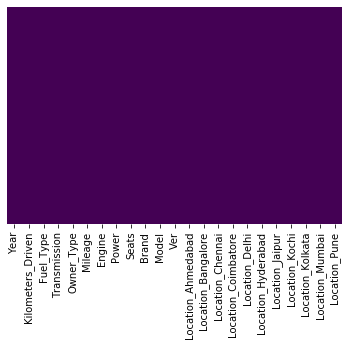

In [49]:
sns.heatmap(data_test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [50]:
# data_test is also completely filled

# Data Visualization

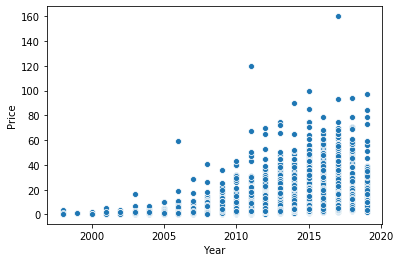

In [77]:
sns.scatterplot(x='Year',y='Price',data=data_train)

#As the 'Year' increases 'Price' also increases

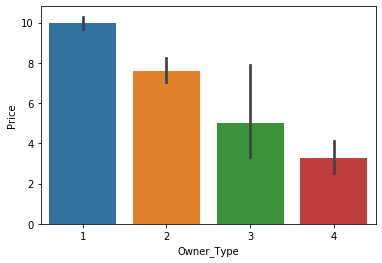

In [80]:
sns.barplot(x='Owner_Type',y='Price', data=data_train)

# Training and Testing

In [51]:
data_train.head()

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,...,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune
0,2010,72000,3,0,1,26.60,998.0,58.16,5.0,1.75,...,0,0,0,0,0,0,0,0,1,0
1,2015,41000,0,0,1,19.67,1582.0,126.20,5.0,12.50,...,0,0,0,0,0,0,0,0,0,1
2,2011,46000,1,0,1,18.20,1199.0,88.70,5.0,4.50,...,0,1,0,0,0,0,0,0,0,0
3,2012,87000,0,0,1,20.77,1248.0,88.76,7.0,6.00,...,0,1,0,0,0,0,0,0,0,0
4,2013,40670,0,1,2,15.20,1968.0,140.80,5.0,17.74,...,0,0,1,0,0,0,0,0,0,0


In [52]:
data_test.head()

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand,...,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune
0,2014,40929,3,0,1,32.26,998.0,58.20000,4.0,18,...,0,0,0,1,0,0,0,0,0,0
1,2013,54493,1,0,2,24.70,796.0,47.30000,5.0,18,...,0,0,1,0,0,0,0,0,0,0
2,2017,34000,0,0,1,13.68,2393.0,147.80000,7.0,28,...,0,0,0,0,0,0,0,0,1,0
3,2012,139000,0,0,1,23.59,1364.0,113.25305,5.0,28,...,0,0,0,0,1,0,0,0,0,0
4,2014,29000,1,0,1,18.50,1197.0,82.85000,5.0,10,...,0,0,0,0,0,0,0,0,1,0


In [53]:
data_train.head()

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,...,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune
0,2010,72000,3,0,1,26.60,998.0,58.16,5.0,1.75,...,0,0,0,0,0,0,0,0,1,0
1,2015,41000,0,0,1,19.67,1582.0,126.20,5.0,12.50,...,0,0,0,0,0,0,0,0,0,1
2,2011,46000,1,0,1,18.20,1199.0,88.70,5.0,4.50,...,0,1,0,0,0,0,0,0,0,0
3,2012,87000,0,0,1,20.77,1248.0,88.76,7.0,6.00,...,0,1,0,0,0,0,0,0,0,0
4,2013,40670,0,1,2,15.20,1968.0,140.80,5.0,17.74,...,0,0,1,0,0,0,0,0,0,0


In [54]:
from sklearn.model_selection import train_test_split

X = data_train.drop(['Price'],axis=1)
y = np.log1p(data_train.Price) 
# Calculating natural log gave a better result for reducing the error values

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=0)

# XGBoost Algorithm

### XGBoost gave best accuracy and faster than many other regression algorithms

In [84]:
from xgboost import XGBRegressor

In [110]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_squared_log_error,r2_score

In [115]:
xgb=XGBRegressor(n_estimators=100000,learning_rate=0.20)
xgb.fit(X_train, y_train, 
             early_stopping_rounds=100, 
             eval_set=[(X_test, y_test)], 
             verbose=False)

predictions = xgb.predict(X_test)
r2score=r2_score(y_test, predictions)

print("Mean Absolute Error: " + str(mean_absolute_error(predictions, y_test)))
print("Mean Squared Error : " + str(mean_squared_error(predictions, y_test)))
print("Mean Squared Log Error : " + str(mean_squared_log_error(predictions, y_test)))
print("\n")
print("R2-Score:",r2score)
print("Accuracy: %.2f%%" % (r2score * 100.0))


Mean Absolute Error: 0.10641921049773036
Mean Squared Error : 0.03138055864646081
Mean Squared Log Error : 0.003229574538721448


R2-Score: 0.9437344299547803
Accuracy: 94.37%


In [123]:
predict = xgb.predict(data_test)
print(predict)

[1.5193187 1.3832462 2.881326  ... 1.4488976 1.6152422 2.9236803]
